In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import caffe
from glob import glob
model_def="prototxt/cls_multi_kernel_val.prototxt"
model_weight="snashots/cls_multi_kernel_0905_iter_960.caffemodel"


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
def normalize(image, MIN_BOUND=-1000.0, MAX_BOUND=400.0):
    '''
    @image：原始数据
    @MIN_BOUND：最小值
    @MAX_BOUND：最大值
    Return：归一化后的image
    ！TODO：数据截断归一化
    '''
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image > 1] = 1.
    image[image < 0] = 0.
    return image  

In [4]:
net=caffe.Net(model_def,model_weight,caffe.TEST)

RuntimeError: Could not open file snashots/cls_multi_kernel_0905_iter_960.caffemodel

In [ ]:
from utils.confuse import ConfusionMeter
confusem=ConfusionMeter(2)
sample_list=open("/home/x/dcsb/Tianchi_caffe/val_cls.txt", 'r').read().splitlines()
nodule_list=[r[:-2] for r in sample_list if r[-1]=='1']
background_list=[r[:-2] for r in sample_list if r[-1]=='0']
import random
random.shuffle(background_list)
print len(nodule_list)
print len(background_list)

In [12]:
result=np.zeros(478)
for ii in range(478):
    img=normalize(np.load(nodule_list[ii]))
    net.blobs["data"].data[...]=img[np.newaxis,np.newaxis,32-20:32+20,32-20:32+20,32-20:32+20]
    result[ii]=net.forward()["probs"].argmax(axis=1)
print result.sum()/478.0

3.35


In [13]:
335.0/478

0.700836820083682

In [15]:
result=np.zeros(1000)
for ii in range(1000):
    img=normalize(np.load(background_list[ii]))
    net.blobs["data"].data[...]=img[np.newaxis,np.newaxis,32-20:32+20,32-20:32+20,32-20:32+20]
    result[ii]=net.forward()["probs"].argmax(axis=1)
print 1-result.sum()/1000.0

KeyboardInterrupt: 

In [11]:
npz_list=glob("/mnt/7/0701_train_nodule_candidate/*.npz")

In [12]:
aac=np.load(npz_list[0])


In [17]:
ig=normalize(aac['data'])
net.blobs["data"].data[...]=ig[np.newaxis,np.newaxis,32-20:32+20,32-20:32+20,32-20:32+20]
result=net.forward()["probs"]

In [5]:
from data.data.dataset import Dataset3 as Dataset

In [6]:
dataset=Dataset('/mnt/7/train_nodule/',augment=True)

[]


In [7]:
img,mask=dataset[64]

IndexError: list index out of range

In [13]:
print np.where(mask==1)[0].mean()

32.5


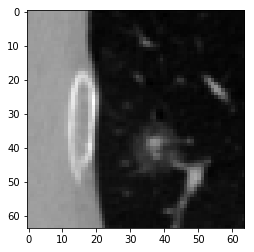

In [14]:
plt.imshow(img[33],cmap='gray')

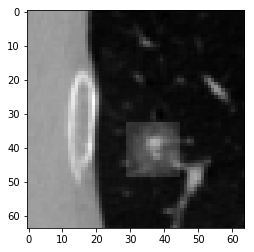

In [15]:
plt.imshow(200*mask[33]+img[33],cmap='gray')

In [17]:
probs=np.load("LKDS-00001_probs.npy")

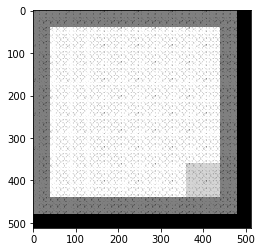

In [21]:
plt.imshow(probs.sum(axis=0),cmap='gray')

In [22]:
aa=np.load('/mnt/7/0704_train_48_64/LKDS-00001_nodule.npy')
bb=np.load('/mnt/7/0704_train_48_64/LKDS-00001_center.npy')

In [23]:
print aa.shape
bb.shape

(24, 48, 48, 48)


(24, 3)